In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols

import numpy as np

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Load data

In [ ]:
# Data available at: http://data.bco-dmo.org/jg/serv/BCO/OMEGAS/Moorings_Temp_pH.brev0

csvs = ["Cape_Blanco.csv", "Kibesillah_Hill.csv", "Bodega.csv", "Terrace_Point.csv", "Lompoc_Landing.csv", "Fogarty_Creek.csv"]
loc_names=["CAP","KIB","BOD","TER","LOM", "FOG"]
col_names=["nothing","Date","Time","Temp","pH"]

df=pd.DataFrame()
for index, c in enumerate(csvs):
  temp=pd.read_csv(c, sep=",", names=col_names)
  temp["Location"]=loc_names[index]
  df=pd.concat([df, temp])

df=df.dropna(subset=['pH'])
df.Date = df.Date.astype('int64')
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d')
df=df[df.pH != 'nd']
df.pH = df.pH.astype(float)

df["Year"]=pd.DatetimeIndex(df['Date']).year
df["Month"]=pd.DatetimeIndex(df['Date']).month
df["Day"]=pd.DatetimeIndex(df['Date']).day

# Data distribution

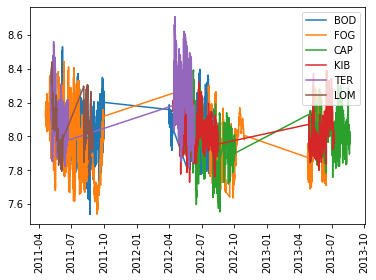

In [ ]:
pops=["BOD","FOG","CAP","KIB","TER","LOM"]
for i in pops:
  plt.plot(df[df["Location"]==i].Date, df[df["Location"]==i].pH, label=i)
  plt.xticks(rotation = 90)
  plt.legend()

In [ ]:
san=pd.read_csv("Southbay_from_CENCOOS.csv", names=["Date","pH"], skiprows=1)
san=san[(san["Date"]>"2011-01-01")&(san["Date"]<"2013-12-31")]
san["Year"]=pd.DatetimeIndex(san['Date']).year
san["Month"]=pd.DatetimeIndex(san['Date']).month
san["Day"]=pd.DatetimeIndex(san['Date']).day
san=san[(san["Month"]>3)&(san["Month"]<11)]
san["Location"]="SAN"

In [ ]:
df=pd.concat([df,san])
df["Date"]=df['Date'].astype(str).str[:10]

In [ ]:
tdf=df.copy()
tdf["Date"]=tdf['Date'].astype(str).str[5:] # check data availability for each month

pops=["BOD","FOG","CAP","KIB","TER","LOM", "SAN"]
tempdf=tdf.groupby(["Location", "Year", "Date"]).count().reset_index()
newdf=pd.DataFrame()
for index, i in enumerate(pops):
  tempdf["nothing"]=index*50 + (tempdf["Year"]-2000)*10 # for plotting purposes
  ttdf=tempdf[tempdf["Location"]==i]
  newdf=pd.concat([newdf,ttdf])

newdf=newdf.sort_values(by=["Date"])

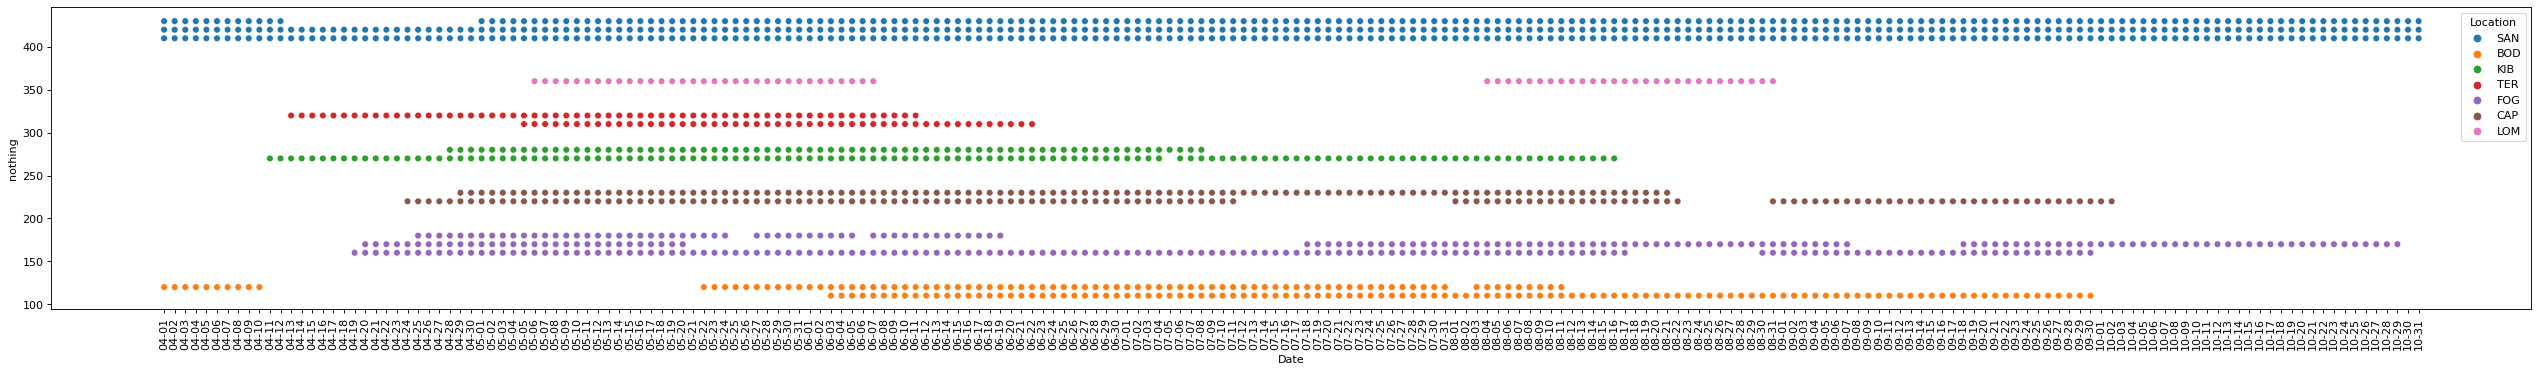

In [ ]:
plt.figure(figsize=(40, 5), dpi=80)
sns.scatterplot(data=newdf, x='Date', y='nothing', hue='Location')
_ = plt.xticks(rotation = 90)

# Restricting analysis

In [ ]:
restrict = False

In [ ]:
# restricting to specific dates based on data distribution
ndf=df.copy()
if restrict:
  ndf=ndf[ndf["Year"]!=2013] # too keep number of datapoints between sites more evenly distributed
  ndf=ndf[(ndf["Month"]>=4) & (ndf["Month"]<=6)] # most relevant + most data availability
# ndf.groupby(["Location", "Date"]).count().reset_index().groupby("Location").count() # number of days with data

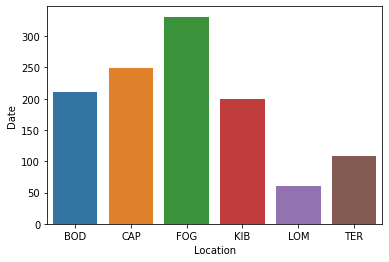

In [ ]:
# Num days with data
sns.barplot(data=ndf.groupby(["Location", "Date"]).count().reset_index().groupby("Location").count().reset_index(), x='Location', y='Date') # num data points

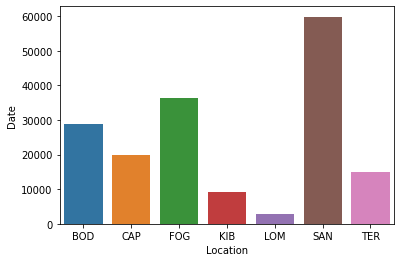

In [ ]:
# Num data points in total
sns.barplot(data=ndf.groupby(["Location"]).count().reset_index(), x='Location', y='Date') # num data points

# Analysis

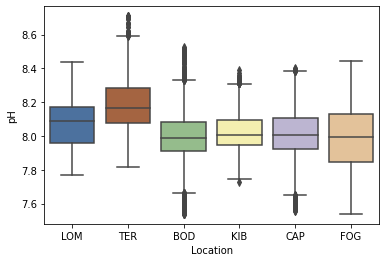

In [ ]:
palette=[(63/255,112/255,171/255,255/255),(181/255,95/255,48/255,255/255),(144/255,196/255,132/255,255/255),(255/255,249/255,165/255,255/255),(186/255,177/255,213/255,255/255),(239/255,195/255,142/255,255/255)]
sns.boxplot(data=ndf, x="Location", y = "pH", order=["LOM","TER","BOD","KIB","CAP","FOG"], palette=palette) # just pH overall 
plt.savefig("ph_dist.png", bbox_inches="tight")

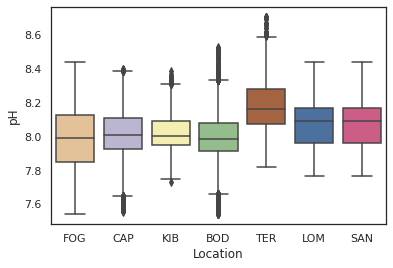

In [ ]:
palette=[(223/255,74/255,130/255,255/255),(63/255,112/255,171/255,255/255),(181/255,95/255,48/255,255/255),(144/255,196/255,132/255,255/255),(255/255,249/255,165/255,255/255),(186/255,177/255,213/255,255/255),(239/255,195/255,142/255,255/255)]
order=["LOM","LOM","TER","BOD","KIB","CAP","FOG"]
order2=["SAN","LOM","TER","BOD","KIB","CAP","FOG"]
palette.reverse()
order.reverse()
order2.reverse()
g=sns.boxplot(data=ndf, x="Location", y = "pH", order=order, palette=palette) # just pH overall 
#sns.boxplot(data=[8.059,8.0713,8.074,8.0767,8.083])
g.set_xticklabels(order2)
plt.savefig("ph_dist_SAN.png", bbox_inches="tight", transparent=True)

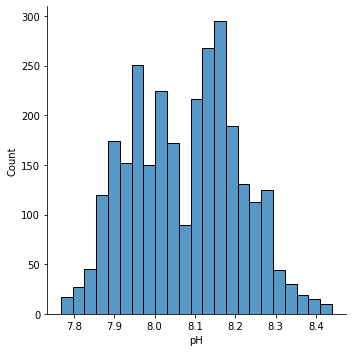

In [ ]:
sns.displot(data=ndf[ndf["Location"]=="LOM"]["pH"])

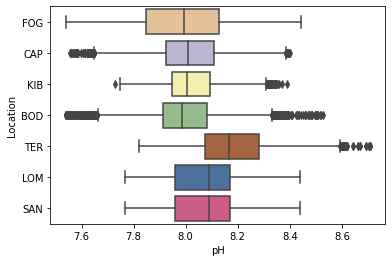

In [ ]:
palette=[(223/255,74/255,130/255,255/255),(63/255,112/255,171/255,255/255),(181/255,95/255,48/255,255/255),(144/255,196/255,132/255,255/255),(255/255,249/255,165/255,255/255),(186/255,177/255,213/255,255/255),(239/255,195/255,142/255,255/255)]
order=["LOM","LOM","TER","BOD","KIB","CAP","FOG"]
order2=["SAN","LOM","TER","BOD","KIB","CAP","FOG"]
palette.reverse()
order.reverse()
order2.reverse()
g=sns.boxplot(data=ndf, x="pH", y = "Location", order=order, palette=palette) # just pH overall 
#sns.boxplot(data=[8.059,8.0713,8.074,8.0767,8.083])
g.set_yticklabels(order2)
plt.savefig("ph_dist_SAN.png", bbox_inches="tight", transparent=True)

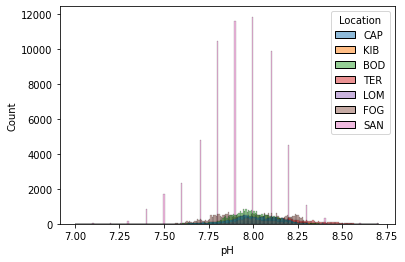

In [ ]:
sns.histplot(data=ndf.reset_index(), x='pH', hue='Location')

### Potential LFMM inputs

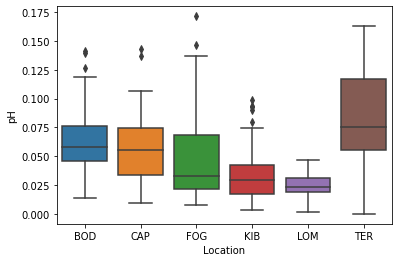

In [ ]:
vdf=ndf.groupby(["Location","Date"]).std().reset_index() # daily varience
sns.boxplot(data=vdf, x='Location', y='pH')

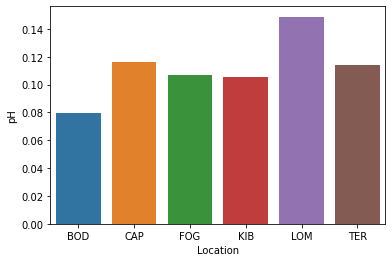

In [ ]:
vdf=ndf.groupby(["Location","Date"]).mean().reset_index() # for each day take mean
vdf=vdf.groupby(["Location"]).std().reset_index() # varience between day means
sns.barplot(data=vdf, x='Location', y='pH') 

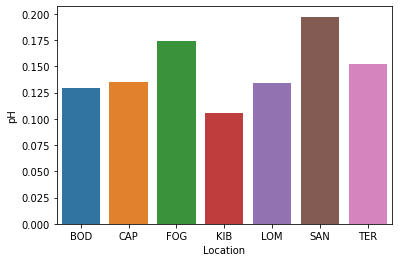

In [ ]:
vdf=ndf.groupby(["Location"]).std().reset_index() # overall varience
sns.barplot(data=vdf, x='Location', y='pH')

In [ ]:
# These are not very informative as I don't care about high pH values...

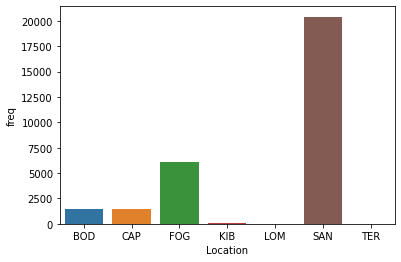

In [ ]:
ndf["freq"]=2
ndf["freq"]=np.where(ndf['pH']<= 7.8, 1, 0) # frequency of data under 7.8
sns.barplot(data=ndf.groupby("Location").sum().reset_index(), x='Location', y='freq') # num data < 7.8

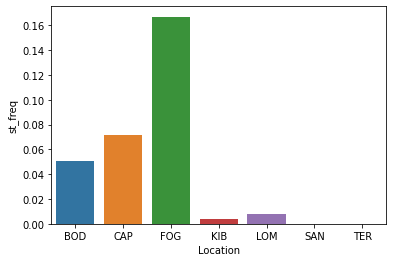

In [ ]:
temp=ndf.groupby(["Location"]).count().reset_index()
rdf=ndf.groupby("Location").sum().reset_index() # correct for sampling frequency
rdf["temp"]=0
rdf.temp=temp.Time
rdf["st_freq"]=rdf["freq"] / rdf["temp"]
sns.barplot(data=rdf, x='Location', y='st_freq') # for BOD most low pH was coming from august or sept 2011

In [ ]:
rdf

,Location,Time,Temp,pH,Year,Month,Day,freq,temp,st_freq
0,BOD,3.379128e+09,329737.65,230973.900,58101586,202212,453348,1466,28886,0.050751
1,CAP,2.298922e+09,202877.75,159666.368,40122530,131774,300656,1428,19937,0.071626
2,FOG,4.195210e+09,372303.65,289187.479,72838052,247315,582687,6046,36207,0.166984
3,KIB,8.804090e+08,93278.35,73685.560,18483827,53873,139623,33,9185,0.003593
4,LOM,2.826288e+08,35879.00,23234.991,5785647,19150,48004,22,2877,0.007647
5,SAN,0.000000e+00,0.00,473697.900,120331874,424649,935437,20407,0,inf
6,TER,1.534188e+09,190999.61,123225.226,30312350,76119,239382,0,15068,0.000000


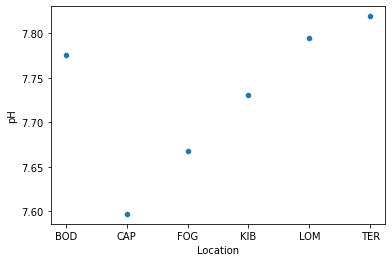

In [ ]:
# overall minimums
sns.scatterplot(data=ndf.groupby("Location").min().reset_index(), x='Location', y='pH')

In [ ]:
ndf.groupby("Location").min().reset_index()

,Location,nothing,Date,Time,Temp,pH,Year,Month,Day,freq
0,BOD,2011-06-03T15:30:00.00Z,2011-06-03,0.0,8.10,7.775,2011,4,1,0
1,CAP,2012-04-24T04:40:00.00Z,2012-04-24,0.0,6.66,7.597,2012,4,1,0
2,FOG,2011-04-19T18:00:00.00Z,2011-04-19,0.0,7.83,7.668,2011,4,1,0
3,KIB,2012-04-11T22:40:00.00Z,2012-04-11,0.0,7.91,7.730,2012,4,1,0
4,LOM,2011-05-06T03:09:00.00Z,2011-05-06,0.0,9.94,7.795,2011,5,1,0
5,TER,2011-05-05T18:10:00.00Z,2011-05-05,0.0,9.11,7.819,2011,4,1,0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  


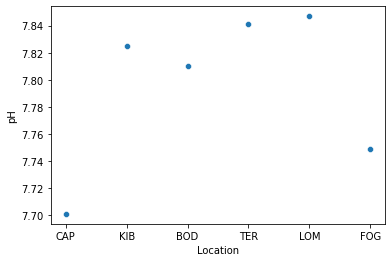

In [ ]:
# average of mins
mins=ndf.groupby(pd.Grouper(key='Location'))['pH'].nsmallest(100).mean(level=0).reset_index()
sns.scatterplot(data=mins, x="Location", y="pH")

In [ ]:
mins

,Location,pH
0,CAP,7.70106
1,KIB,7.82525
2,BOD,7.81032
3,TER,7.84115
4,LOM,7.84692
5,FOG,7.74930


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.
  


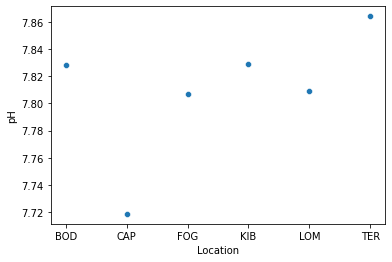

In [ ]:
# lower 1%
quants=ndf.groupby("Location").quantile(.01).reset_index()
sns.scatterplot(data=quants, x="Location", y="pH")

In [ ]:
#Repeat above with daily means - aka low pH events instead of single reads...
ndf=ndf.groupby(["Location","Date"]).mean().reset_index()

# with looking at daily averages it is tricky because it is so so variable within the days. in the end there are no 7.8 events apart from in CAP

In [ ]:
order = ['FOG', 'CAP', 'KIB', 'BOD', 'TER', 'LOM']

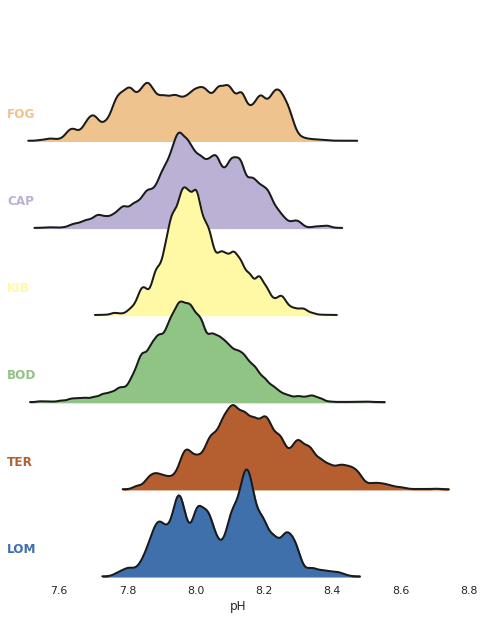

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Create the data


# Initialize the FacetGrid object
g = sns.FacetGrid(ndf, 
                  row="Location", 
                  hue="Location", 
                  aspect=5, 
                  height=1.5, 
                  palette=palette,
                  row_order=order,
                  hue_order=order,
                  )

# Draw the densities in a few steps
g.map(sns.kdeplot, 
      "pH",
      bw_adjust=.5, 
      clip_on=False,
      fill=True, 
      alpha=1, 
      linewidth=1.5)

g.map(sns.kdeplot, "pH", clip_on=False, color="k", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
#g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "pH")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.35)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)
plt.savefig("ph_dist_SAN.png", bbox_inches="tight",transparent=True)